In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from openpyxl import load_workbook

In [2]:
#한글 폰트
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
plt.rc('font', family= 'Malgun Gothic')

In [3]:
# 데이터 출처 : 시군구별_이동자수 데이터(2000~2021), Kosis
# https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B26001_A01&conn_path=I2
p_move = pd.read_excel('./data/시군구별_이동자수_20230117225918.xlsx')

In [4]:
p_move.set_index('행정구역(시군구)별', inplace=True)

In [5]:
p_move

,시점,총전입 (명),총전출 (명),순이동 (명),시도내이동-시군구내 (명),시도내이동-시군구간 전입 (명),시도내이동-시군구간 전출 (명),시도간전입 (명),시도간전출 (명)
행정구역(시군구)별,,,,,,,,,
전국,2000.0,9009441,9009441,0,3299280,2864330,2864330,2845831,2845831
서울특별시,NaN,2219407,2266346,-46939,705781,876648,876648,636978,683917
부산광역시,NaN,595975,639669,-43694,183925,282146,282146,129904,173598
대구광역시,NaN,477595,480947,-3352,159243,208215,208215,110137,113489
인천광역시,NaN,531318,518153,13165,170161,187941,187941,173216,160051
...,...,...,...,...,...,...,...,...,...
전라북도,NaN,223710,229511,-5801,114540,47692,47692,61478,67279
전라남도,NaN,223619,228106,-4487,89248,49323,49323,85048,89535
경상북도,NaN,317866,314529,3337,131535,55875,55875,130456,127119


In [6]:
p_move.fillna(method='ffill', inplace = True)

In [7]:
p_move.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 전국 to 제주특별자치도
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   시점                 396 non-null    float64
 1   총전입 (명)            396 non-null    object 
 2   총전출 (명)            396 non-null    object 
 3   순이동 (명)            396 non-null    object 
 4   시도내이동-시군구내 (명)     396 non-null    object 
 5   시도내이동-시군구간 전입 (명)  396 non-null    object 
 6   시도내이동-시군구간 전출 (명)  396 non-null    object 
 7   시도간전입 (명)          396 non-null    object 
 8   시도간전출 (명)          396 non-null    object 
dtypes: float64(1), object(8)
memory usage: 30.9+ KB


In [8]:
p_move.head(19)

,시점,총전입 (명),총전출 (명),순이동 (명),시도내이동-시군구내 (명),시도내이동-시군구간 전입 (명),시도내이동-시군구간 전출 (명),시도간전입 (명),시도간전출 (명)
행정구역(시군구)별,,,,,,,,,
전국,2000.0,9009441,9009441,0,3299280,2864330,2864330,2845831,2845831
서울특별시,2000.0,2219407,2266346,-46939,705781,876648,876648,636978,683917
부산광역시,2000.0,595975,639669,-43694,183925,282146,282146,129904,173598
대구광역시,2000.0,477595,480947,-3352,159243,208215,208215,110137,113489
인천광역시,2000.0,531318,518153,13165,170161,187941,187941,173216,160051
광주광역시,2000.0,301498,301512,-14,92582,106342,106342,102574,102588
대전광역시,2000.0,312560,303984,8576,92251,119596,119596,100713,92137
울산광역시,2000.0,166690,163474,3216,58355,57504,57504,50831,47615
세종특별자치시,2000.0,-,-,-,-,-,-,-,-


In [9]:
p_move.replace('-', 0, inplace=True)

In [10]:
p_move = p_move.astype(np.int64)

In [11]:
p_move.shape[0]

396

In [12]:
p_move.iloc[1, 2]

2266346

In [13]:
move_df = pd.DataFrame({
    '연도' : np.arange(2000,2022)
})
for j in range(0, p_move.shape[0], 18):
    move_df.at[j/18, '전국 이동자 수'] = p_move.iloc[j, 1]/1000
    move_df.at[j/18, '수도권 총전입(천 명)'] = (p_move.iloc[j+1, 1] + p_move.iloc[j+4, 1] + p_move.iloc[j+9, 1])/1000
    move_df.at[j/18, '수도권 총전출(천 명)'] = (p_move.iloc[j+1, 2] + p_move.iloc[j+4, 2] + p_move.iloc[j+9, 2])/1000

move_df['수도권 순이동자 수(천 명)'] = (move_df['수도권 총전입(천 명)'] - move_df['수도권 총전출(천 명)'])
move_df = move_df.astype(np.int64)
move_df

,연도,전국 이동자 수,수도권 총전입(천 명),수도권 총전출(천 명),수도권 순이동자 수(천 명)
0,2000,9009,4793,4642,150
1,2001,9289,5078,4942,136
2,2002,9584,5308,5098,209
3,2003,9516,5057,4920,136
4,2004,8567,4468,4327,140
5,2005,8795,4690,4561,128
6,2006,9342,5157,5045,111
7,2007,9070,4961,4878,82
8,2008,8808,4786,4734,52
9,2009,8487,4527,4483,43


<AxesSubplot:title={'center':'수도권 순유입 그래프'}, xlabel='연도', ylabel='수도권 순이동자 수(천 명)'>

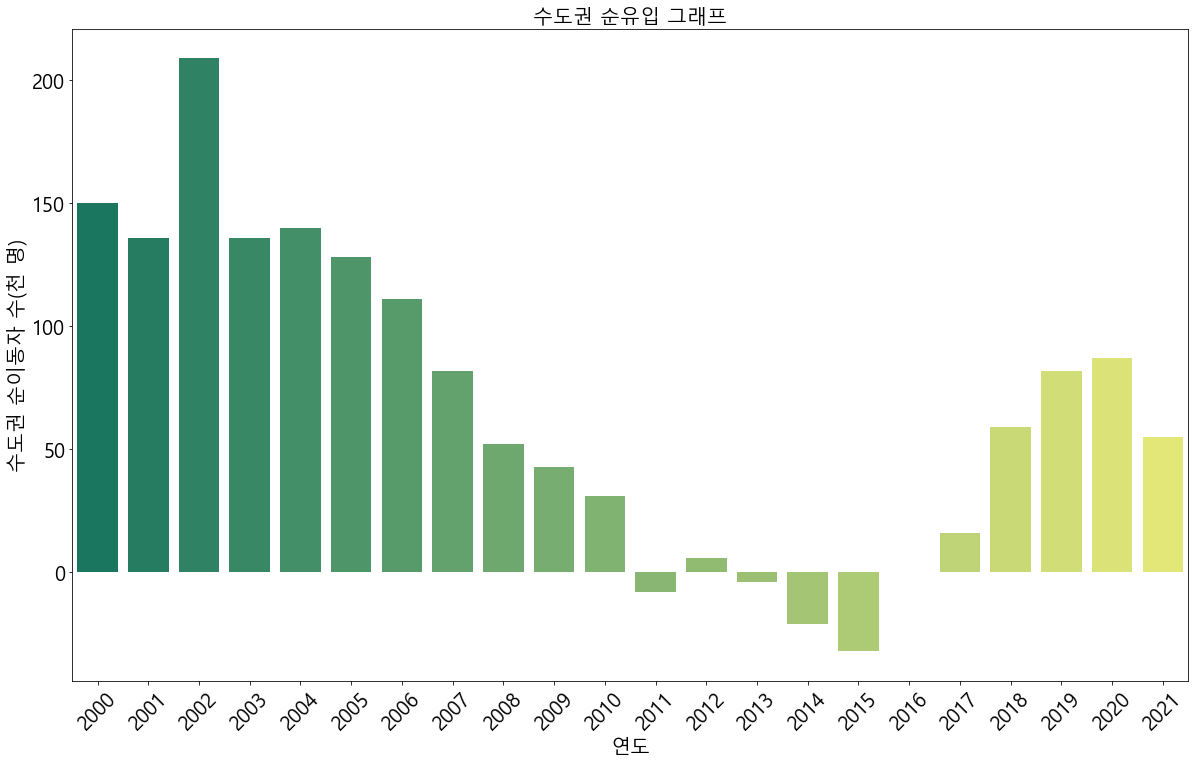

In [14]:
plt.figure(figsize=(20,12))
plt.title("수도권 순유입 그래프", fontdict={'fontsize' : 20})
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.xlabel('-',fontsize=20)
plt.ylabel('-',fontsize=20)

sns.barplot(data = move_df, x = '연도', y = '수도권 순이동자 수(천 명)', palette='summer')

In [15]:
p_sex_age_move = pd.read_excel('./data/성_연령별_순이동.xlsx', header=1)
p_sex_age_move

,전출지별,전입지별,성별,연령별,항목,단위,2000 년,2001 년,2002 년,2003 년,...,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
0,부산광역시,서울특별시,계,계,이동자수[명],명,28564.0,28366.0,28049.0,26569.0,...,21437,19621,20616,19441,19236,19460,19737,20285,20990,20009
1,부산광역시,서울특별시,계,계,순이동자수[명],명,12596.0,12238.0,11317.0,10201.0,...,5302,3468,3296,2432,4174,4976,6644,7480,7781,6931
2,부산광역시,서울특별시,계,0 - 4세,이동자수[명],명,1408.0,1254.0,1294.0,942.0,...,578,567,630,513,474,478,436,374,389,285
3,부산광역시,서울특별시,계,0 - 4세,순이동자수[명],명,287.0,188.0,139.0,41.0,...,-158,-266,-179,-216,-202,-185,-82,-79,-43,-58
4,부산광역시,서울특별시,계,5 - 9세,이동자수[명],명,1356.0,1238.0,1210.0,1095.0,...,484,377,380,340,328,347,332,360,402,282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,제주특별자치도,경기도,여자,70 - 74세,순이동자수[명],명,3.0,3.0,0.0,-2.0,...,-18,-18,-34,-22,-20,-27,-15,-11,6,8
4532,제주특별자치도,경기도,여자,75 - 79세,이동자수[명],명,15.0,14.0,19.0,19.0,...,33,39,30,38,29,37,49,46,39,53
4533,제주특별자치도,경기도,여자,75 - 79세,순이동자수[명],명,1.0,-1.0,-3.0,3.0,...,-7,1,-4,-9,-18,-34,-3,7,-4,2
4534,제주특별자치도,경기도,여자,80세이상,이동자수[명],명,10.0,16.0,16.0,20.0,...,36,29,43,46,50,54,62,67,53,76


In [16]:
p_sex_age_move.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4536 entries, 0 to 4535
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   전출지별    4536 non-null   object 
 1   전입지별    4536 non-null   object 
 2   성별      4536 non-null   object 
 3   연령별     4536 non-null   object 
 4   항목      4536 non-null   object 
 5   단위      4536 non-null   object 
 6   2000 년  4212 non-null   float64
 7   2001 년  4212 non-null   float64
 8   2002 년  4212 non-null   float64
 9   2003 년  4212 non-null   float64
 10  2004 년  4212 non-null   float64
 11  2005 년  4212 non-null   float64
 12  2006 년  4212 non-null   float64
 13  2007 년  4212 non-null   float64
 14  2008 년  4212 non-null   float64
 15  2009 년  4212 non-null   float64
 16  2010 년  4212 non-null   float64
 17  2011 년  4212 non-null   float64
 18  2012 년  4536 non-null   int64  
 19  2013 년  4536 non-null   int64  
 20  2014 년  4536 non-null   int64  
 21  2015 년  4536 non-null   int64  
 22  

In [17]:
p_sex_age_move.fillna(0, inplace=True)

In [18]:
p_sex_age_move.isna().sum()

전출지별      0
전입지별      0
성별        0
연령별       0
항목        0
단위        0
2000 년    0
2001 년    0
2002 년    0
2003 년    0
2004 년    0
2005 년    0
2006 년    0
2007 년    0
2008 년    0
2009 년    0
2010 년    0
2011 년    0
2012 년    0
2013 년    0
2014 년    0
2015 년    0
2016 년    0
2017 년    0
2018 년    0
2019 년    0
2020 년    0
2021 년    0
dtype: int64

In [19]:
drop1 = p_sex_age_move['항목'] == '이동자수[명]'

In [20]:
p_sex_age_move.drop(index=p_sex_age_move[drop1].index, inplace=True)

In [21]:
group_sam = p_sex_age_move.groupby(['성별', '연령별', '항목']).sum()

In [22]:
group_sam

2000 년    2001 년    2002 년    2003 년    2004 년  \
성별 연령별      항목                                                           
계  0 - 4세   순이동자수[명]    2836.0    -338.0   10174.0   -4170.0    4424.0   
   10 - 14세 순이동자수[명]    4797.0    3557.0    9029.0    4440.0    8349.0   
   15 - 19세 순이동자수[명]   10989.0   10616.0   17864.0    8637.0    9470.0   
   20 - 24세 순이동자수[명]   47092.0   50152.0   65515.0   51855.0   45220.0   
   25 - 29세 순이동자수[명]   59003.0   52108.0   52732.0   50057.0   38856.0   
   30 - 34세 순이동자수[명]   10307.0    8082.0   14666.0    8469.0    8372.0   
   35 - 39세 순이동자수[명]    3359.0    3067.0    9029.0    3474.0    5002.0   
   40 - 44세 순이동자수[명]    3264.0    2906.0    6991.0    3230.0    3726.0   
   45 - 49세 순이동자수[명]    1124.0    1016.0    3353.0    1758.0    1871.0   
   5 - 9세   순이동자수[명]    3046.0    1194.0    9208.0     458.0    7187.0   
   50 - 54세 순이동자수[명]      55.0     148.0    2075.0     698.0     760.0   
   55 - 59세 순이동자수[명]     294.0      97.0    1406.0    1066.0     662.0   
   60 - 64세 순이동자수[명]     325.0     443.0    1742.0    1229.0     734.0   
   65 - 69세 순이동자수[명]     798.0     683.0    1659.0    1801.0    1426.0   
   70 - 74세 순이동자수[명]     830.0     729.0    1665.0    1507.0    1634.0   
   75 - 79세 순이동자수[명]    1037.0     808.0    1226.0    1256.0    1325.0   
   80세이상    순이동자수[명]    1096.0     847.0    1257.0    1139.0    1318.0   
   계        순이동자수[명]  150252.0  136115.0  209591.0  136904.0  140336.0   
남자 0 - 4세   순이동자수[명]    1396.0    -228.0    5171.0   -1828.0    2354.0   
   10 - 14세 순이동자수[명]    2482.0    1843.0    4615.0    2165.0    4316.0   
   15 - 19세 순이동자수[명]    4300.0    4079.0    6462.0    3141.0    4141.0   
   20 - 24세 순이동자수[명]   19520.0   20512.0   29512.0   18620.0   17578.0   
   25 - 29세 순이동자수[명]   38845.0   34449.0   32673.0   31602.0   22741.0   
   30 - 34세 순이동자수[명]    6698.0    5160.0    7671.0    5386.0    3289.0   
   35 - 39세 순이동자수[명]    1272.0    1448.0    3644.0    1651.0    1137.0   
   40 - 44세 순이동자수[명]    1378.0    1222.0    2900.0    1316.0     896.0   
   45 - 49세 순이동자수[명]     303.0     369.0    1219.0     548.0     322.0   
   5 - 9세   순이동자수[명]    1682.0     701.0    5020.0     177.0    3926.0   
   50 - 54세 순이동자수[명]    -147.0    -204.0     522.0      39.0    -384.0   
   55 - 59세 순이동자수[명]    -166.0    -324.0     216.0     -89.0    -404.0   
   60 - 64세 순이동자수[명]    -239.0    -164.0     290.0    -154.0    -213.0   
   65 - 69세 순이동자수[명]     120.0      -8.0     190.0     253.0     195.0   
   70 - 74세 순이동자수[명]     201.0     119.0     309.0     415.0     443.0   
   75 - 79세 순이동자수[명]     333.0     223.0     396.0     306.0     325.0   
   80세이상    순이동자수[명]     329.0     294.0     376.0     441.0     467.0   
   계        순이동자수[명]   78307.0   69491.0  101186.0   63989.0   61129.0   
여자 0 - 4세   순이동자수[명]    1440.0    -110.0    5003.0   -2342.0    2070.0   
   10 - 14세 순이동자수[명]    2315.0    1714.0    4414.0    2275.0    4033.0   
   15 - 19세 순이동자수[명]    6689.0    6537.0   11402.0    5496.0    5329.0   
   20 - 24세 순이동자수[명]   27572.0   29640.0   36003.0   33235.0   27642.0   
   25 - 29세 순이동자수[명]   20158.0   17659.0   20059.0   18455.0   16115.0   
   30 - 34세 순이동자수[명]    3609.0    2922.0    6995.0    3083.0    5083.0   
   35 - 39세 순이동자수[명]    2087.0    1619.0    5385.0    1823.0    3865.0   
   40 - 44세 순이동자수[명]    1886.0    1684.0    4091.0    1914.0    2830.0   
   45 - 49세 순이동자수[명]     821.0     647.0    2134.0    1210.0    1549.0   
   5 - 9세   순이동자수[명]    1364.0     493.0    4188.0     281.0    3261.0   
   50 - 54세 순이동자수[명]     202.0     352.0    1553.0     659.0    1144.0   
   55 - 59세 순이동자수[명]     460.0     421.0    1190.0    1155.0    1066.0   
   60 - 64세 순이동자수[명]     564.0     607.0    1452.0    1383.0     947.0   
   65 - 69세 순이동자수[명]     678.0     691.0    1469.0    1548.0    1231.0   
   70 - 74세 순이동자수[명]     629.0     610.0    1356.0    1092.0    1191.0   
   75 - 79세 순이동자수[명]     704.0     585.0     830.0     950.0    1000.0   
   80세이상    순이동자수[명]     767

In [23]:
group_sam.iloc[17, 0] # 53 여 , 35 남, 17 계

150252.0

In [24]:
sex_age_move_df = pd.DataFrame({
    '연도' : np.arange(2000,2022),
    '남' : 0,
    '여' : 0,
    '계' : 0,
    '10세 미만' : 0, # 0 + 9
    '10대' : 0, # 1 + 2
    '20-24세' : 0, # 3
    '25-29세' : 0, # 4
    '30-34세' : 0, # 5
    '35-39세' : 0, # 6
    '40대' : 0, # 7 + 8
    '50대' : 0, # 10 + 11 
    '60대 이상' : 0, # 12 + 13 + 14 + 15 + 16
    
})

for i in range(0, group_sam.shape[1]):
    sex_age_move_df.at[i, '남'] += group_sam.iloc[35, i]
    sex_age_move_df.at[i, '여'] += group_sam.iloc[53, i]
    sex_age_move_df.at[i, '계'] += group_sam.iloc[17, i]
    sex_age_move_df.at[i, '10세 미만'] += group_sam.iloc[0, i] + group_sam.iloc[9, i]
    sex_age_move_df.at[i, '10대'] += group_sam.iloc[1, i] + group_sam.iloc[2, i]
    sex_age_move_df.at[i, '20-24세'] += group_sam.iloc[3, i]
    sex_age_move_df.at[i, '25-29세'] += group_sam.iloc[4, i]
    sex_age_move_df.at[i, '30-34세'] += group_sam.iloc[5, i]
    sex_age_move_df.at[i, '35-39세'] += group_sam.iloc[6, i]
    sex_age_move_df.at[i, '40대'] += group_sam.iloc[7, i] + group_sam.iloc[8, i]
    sex_age_move_df.at[i, '50대'] += group_sam.iloc[10, i] + group_sam.iloc[11, i]
    sex_age_move_df.at[i, '60대 이상'] += group_sam.iloc[12, i] + group_sam.iloc[13, i] + group_sam.iloc[14, i] + group_sam.iloc[15, i]
    
sex_age_move_df = sex_age_move_df.astype(np.int64)
sex_age_move_df

# sex_age_move_df['연도', '성별', '연령']

,연도,남,여,계,10세 미만,10대,20-24세,25-29세,30-34세,35-39세,40대,50대,60대 이상
0,2000,78307,71945,150252,5882,15786,47092,59003,10307,3359,4388,349,2990
1,2001,69491,66624,136115,856,14173,50152,52108,8082,3067,3922,245,2663
2,2002,101186,108405,209591,19382,26893,65515,52732,14666,9029,10344,3481,6292
3,2003,63989,72915,136904,-3712,13077,51855,50057,8469,3474,4988,1764,5793
4,2004,61129,79207,140336,11611,17819,45220,38856,8372,5002,5597,1422,5119
5,2005,58671,70138,128809,4457,14827,48464,41596,6728,3112,3883,41,4296
6,2006,50002,61698,111700,344,12130,44301,39993,5729,1119,1726,113,4682
7,2007,35666,47272,82938,-2687,8404,37610,37571,2971,-1155,-1467,-1169,1955
8,2008,19803,32219,52022,-3092,8199,29559,29878,635,-2811,-4870,-3940,-2523
9,2009,17545,26442,43987,-4145,7768,27364,25180,589,-3331,-3825,-3621,-3013


In [25]:
sex_age_move_df.loc[:, '연도']

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
16    2016
17    2017
18    2018
19    2019
20    2020
21    2021
Name: 연도, dtype: int64

In [26]:
age_move_df = sex_age_move_df.iloc[:, 4:]
age_move_df.set_index(sex_age_move_df.loc[:, '연도'], inplace=True)
age_move_df

,10세 미만,10대,20-24세,25-29세,30-34세,35-39세,40대,50대,60대 이상
연도,,,,,,,,,
2000,5882,15786,47092,59003,10307,3359,4388,349,2990
2001,856,14173,50152,52108,8082,3067,3922,245,2663
2002,19382,26893,65515,52732,14666,9029,10344,3481,6292
2003,-3712,13077,51855,50057,8469,3474,4988,1764,5793
2004,11611,17819,45220,38856,8372,5002,5597,1422,5119
2005,4457,14827,48464,41596,6728,3112,3883,41,4296
2006,344,12130,44301,39993,5729,1119,1726,113,4682
2007,-2687,8404,37610,37571,2971,-1155,-1467,-1169,1955
2008,-3092,8199,29559,29878,635,-2811,-4870,-3940,-2523


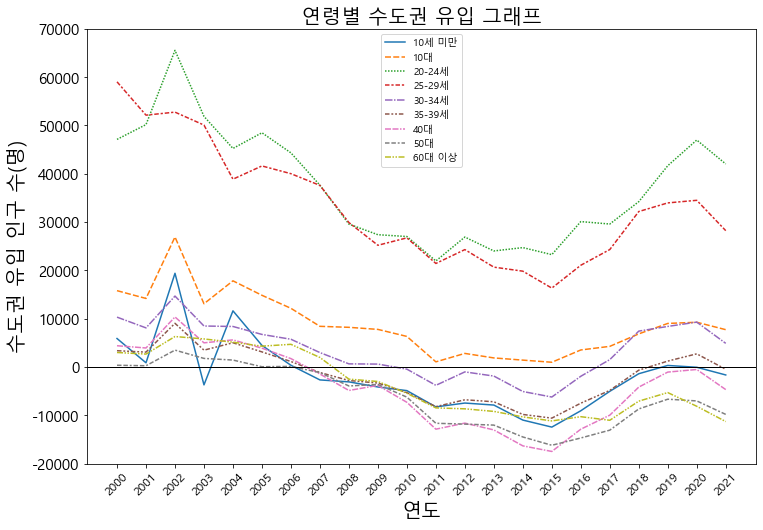

In [27]:
# age_move_df.plot(figsize=(12,8))

plt.figure(figsize=(12, 8))
sns.lineplot(data=age_move_df)
plt.title("연령별 수도권 유입 그래프", fontdict={'fontsize' : 20})
plt.xticks(np.arange(2000, 2022, step=1),fontsize=12,rotation=45)
plt.yticks(fontsize=15)
plt.axhline(y=0, color='black', linewidth=1)

plt.rcParams['axes.unicode_minus']=False
plt.ylim([-20000, 70000])
plt.xlabel('연도',fontsize=20)
plt.ylabel('수도권 유입 인구 수(명)',fontsize=20)
plt.show()

In [28]:
# 
df_p1 = pd.read_excel('./data/시군구_성_연령_주민등록인구_1.xlsx', header=1)
df_p1

,행정구역(시군구)별,성별,연령별,항목,단위,2000 년,2001 년,2002 년,2003 년,2004 년,...,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,2022 년
0,전국,계,계,주민등록연앙인구[명],명,47534117.0,47877048.5,48125744.5,48308385.5,48485314.0,...,50558951.5,50763158.0,50951719.0,51112971.5,51230704.0,51300879.5,51337423.5,51349259.0,51333252.5,51259150.0
1,전국,계,20 - 24세,주민등록연앙인구[명],명,3923161.0,3978666.0,4031154.5,4057274.5,3981199.0,...,3349079.0,3433785.5,3509440.0,3534683.5,3498959.0,3436410.5,3353801.0,3272265.0,3175015.0,3023612.0
2,전국,계,25 - 29세,주민등록연앙인구[명],명,4491340.0,4324799.5,4162698.5,4003477.5,3890299.5,...,3226780.5,3151400.5,3130239.0,3161268.5,3252272.5,3347964.5,3430877.0,3505179.5,3529975.0,3493109.0
3,전국,계,30 - 34세,주민등록연앙인구[명],명,4479771.0,4566458.0,4632112.0,4612819.0,4546133.5,...,4042034.0,3971975.5,3796511.0,3597549.5,3389545.5,3227142.5,3151167.0,3130579.0,3162503.5,3252003.0
4,전국,계,35 - 39세,주민등록연앙인구[명],명,4411156.5,4305524.0,4226115.5,4261933.0,4353161.0,...,3976799.0,3875142.5,3881395.5,3941157.5,3999098.5,4031400.0,3960321.0,3786437.5,3590685.5,3383872.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7600,서귀포시,여자,85세 이상,주민등록연앙인구[명],명,451.5,469.5,486.0,504.0,522.5,...,1835.5,1953.0,2099.5,2251.5,2448.5,2690.0,2947.0,3222.0,3439.5,3604.5
7601,서귀포시,여자,85 - 89세,주민등록연앙인구[명],명,310.0,322.0,326.5,335.5,353.5,...,994.5,1063.5,1246.0,1404.5,1568.5,1763.0,1969.5,2164.5,2298.0,2376.5
7602,서귀포시,여자,90 - 94세,주민등록연앙인구[명],명,110.0,116.5,125.0,131.0,131.5,...,653.0,693.0,650.5,619.5,605.0,589.0,622.5,726.0,831.0,933.0
7603,서귀포시,여자,95 - 99세,주민등록연앙인구[명],명,24.5,26.0,29.0,30.0,30.0,...,157.5,164.5,168.5,189.0,232.5,292.0,302.5,276.0,249.5,225.0


In [29]:
df_p1.drop(columns=['항목', '단위', '2000 년', '2001 년', '2002 년', '2003 년', '2004 년', '2005 년', '2006 년', '2007 년', '2008 년',
                         '2009 년', '2010 년', '2011 년', '2012 년', '2013 년', '2014 년', '2015 년', '2016 년', '2017 년', '2018 년', '2019 년', '2020 년', '2022 년'], inplace=True)

In [30]:
df_p1['행정구역(시군구)별'].unique()

array(['전국', '서울특별시', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구',
       '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구',
       '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구',
       '부산광역시', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구',
       '사하구', '금정구', '연제구', '수영구', '사상구', '기장군', '대구광역시', '수성구', '달서구',
       '달성군', '인천광역시', '미추홀구', '연수구', '남동구', '부평구', '계양구', '강화군', '옹진군',
       '광주광역시', '광산구', '대전광역시', '유성구', '대덕구', '울산광역시', '울주군', '세종특별자치시',
       '세종시', '경기도', '일산구', '양주군', '여주군', '화성군', '광주군', '포천군', '수원시',
       '장안구', '권선구', '팔달구', '영통구', '성남시', '수정구', '중원구', '분당구', '의정부시',
       '안양시', '만안구', '동안구', '부천시', '원미구', '소사구', '오정구', '광명시', '평택시',
       '동두천시', '안산시', '상록구', '단원구', '고양시', '덕양구', '일산동구', '일산서구', '과천시',
       '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시', '처인구',
       '기흥구', '수지구', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시',
       '포천시', '여주시', '연천군', '가평군', '양평군', '충청남도', '연기군', '천안시', '동남구',
   

In [31]:
for i in range(45, 1215): # 서울 45 ~ 1214
    df_p1.at[i, '행정구역(시군구)별'] = '서울특별시 ' + df_p1.iloc[i, 0]
for i in range(1215, 1980): # 부산 1215~1979
    df_p1.at[i, '행정구역(시군구)별'] = '부산광역시 ' + df_p1.iloc[i, 0]
for i in range(1980, 2385): # 대구 1980 ~ 2384
    df_p1.at[i, '행정구역(시군구)별'] = '대구광역시 ' + df_p1.iloc[i, 0]
for i in range(2385, 2925): # 인천 2385~2924
    df_p1.at[i, '행정구역(시군구)별'] = '인천광역시 ' + df_p1.iloc[i, 0]
for i in range(2925, 3195): # 광주 2925 ~ 3194
    df_p1.at[i, '행정구역(시군구)별'] = '광주광역시 ' + df_p1.iloc[i, 0]
for i in range(3195, 3465): # 대전 3195~3464
    df_p1.at[i, '행정구역(시군구)별'] = '대전광역시 ' + df_p1.iloc[i, 0]
for i in range(3465, 3735): # 울산 3465~3734
    df_p1.at[i, '행정구역(시군구)별'] = '울산광역시 ' + df_p1.iloc[i, 0]
for i in range(3735, 3825): # 세종 3465~3734
    df_p1.at[i, '행정구역(시군구)별'] = '세종특별자치시 ' + df_p1.iloc[i, 0]

In [32]:
for i in range(4140, 4365): # 수원 4140 ~ 4364
    df_p1.at[i, '행정구역(시군구)별'] = '수원시 ' + df_p1.iloc[i, 0]
for i in range(4365, 4545): # 성남 4365~4544
    df_p1.at[i, '행정구역(시군구)별'] = '성남시 ' + df_p1.iloc[i, 0]
for i in range(4590, 4725): # 안양 4590 ~ 4724
    df_p1.at[i, '행정구역(시군구)별'] = '안양시 ' + df_p1.iloc[i, 0]
for i in range(5040, 5175): # 안산 5040~5174
    df_p1.at[i, '행정구역(시군구)별'] = '안산시 ' + df_p1.iloc[i, 0]
for i in range(5175, 5355): # 고양 5175 ~ 5355
    df_p1.at[i, '행정구역(시군구)별'] = '고양시 ' + df_p1.iloc[i, 0]
for i in range(5715, 5895): # 용인 5715~5894
    df_p1.at[i, '행정구역(시군구)별'] = '용인시 ' + df_p1.iloc[i, 0]
for i in range(6525, 6660): # 천안 6525~6659
    df_p1.at[i, '행정구역(시군구)별'] = '천안시 ' + df_p1.iloc[i, 0]

In [33]:
for i in range(3825, 6435): # 경기도 3825 ~ 6435
    df_p1.at[i, '행정구역(시군구)별'] = '경기도 ' + df_p1.iloc[i, 0]
for i in range(6435, 7380): # 충남 6435~7380
    df_p1.at[i, '행정구역(시군구)별'] = '충남 ' + df_p1.iloc[i, 0]
for i in range(7380, 7605): # 천안 6525~6659
    df_p1.at[i, '행정구역(시군구)별'] = '제주 ' + df_p1.iloc[i, 0]

In [34]:
df_p1[df_p1['행정구역(시군구)별'] == '서귀포시']

,행정구역(시군구)별,성별,연령별,2021 년


In [35]:
# 사라진 또는 분리된 구 (2021년도에 표시되지 않은) 구 제거
df_p1.dropna(inplace=True)

In [36]:
df_p1['행정구역(시군구)별'].unique()

array(['전국', '서울특별시 서울특별시', '서울특별시 종로구', '서울특별시 중구', '서울특별시 용산구',
       '서울특별시 성동구', '서울특별시 광진구', '서울특별시 동대문구', '서울특별시 중랑구', '서울특별시 성북구',
       '서울특별시 강북구', '서울특별시 도봉구', '서울특별시 노원구', '서울특별시 은평구', '서울특별시 서대문구',
       '서울특별시 마포구', '서울특별시 양천구', '서울특별시 강서구', '서울특별시 구로구', '서울특별시 금천구',
       '서울특별시 영등포구', '서울특별시 동작구', '서울특별시 관악구', '서울특별시 서초구', '서울특별시 강남구',
       '서울특별시 송파구', '서울특별시 강동구', '부산광역시 부산광역시', '부산광역시 중구', '부산광역시 서구',
       '부산광역시 동구', '부산광역시 영도구', '부산광역시 부산진구', '부산광역시 동래구', '부산광역시 남구',
       '부산광역시 북구', '부산광역시 해운대구', '부산광역시 사하구', '부산광역시 금정구', '부산광역시 강서구',
       '부산광역시 연제구', '부산광역시 수영구', '부산광역시 사상구', '부산광역시 기장군', '대구광역시 대구광역시',
       '대구광역시 중구', '대구광역시 동구', '대구광역시 서구', '대구광역시 남구', '대구광역시 북구',
       '대구광역시 수성구', '대구광역시 달서구', '대구광역시 달성군', '인천광역시 인천광역시', '인천광역시 중구',
       '인천광역시 동구', '인천광역시 미추홀구', '인천광역시 연수구', '인천광역시 남동구', '인천광역시 부평구',
       '인천광역시 계양구', '인천광역시 서구', '인천광역시 강화군', '인천광역시 옹진군', '광주광역시 광주광역시',
       '광주광역시 동구', '광주광역시 서구', '광주광역시 남구', '광주광역시 북구', '광주광역시 광산구',
 

In [37]:
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '서울특별시 서울특별시')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '부산광역시 부산광역시')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '대구광역시 대구광역시')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '인천광역시 인천광역시')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '광주광역시 광주광역시')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '대전광역시 대전광역시')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '울산광역시 울산광역시')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '세종특별자치시 세종특별자치시')].index, inplace=True)

df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '경기도 경기도')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '충남 충청남도')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '제주 제주특별자치도')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '경기도 수원시 수원시')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '경기도 성남시 성남시')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '경기도 안양시 안양시')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '경기도 안산시 안산시')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '경기도 고양시 고양시')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '경기도 용인시 용인시')].index, inplace=True)
df_p1.drop(df_p1[(df_p1['행정구역(시군구)별'] == '충남 천안시 천안시')].index, inplace=True)

df_p1.reset_index(drop=True, inplace=True)

In [38]:
df_p1

,행정구역(시군구)별,성별,연령별,2021 년
0,전국,계,계,51333252.5
1,전국,계,20 - 24세,3175015.0
2,전국,계,25 - 29세,3529975.0
3,전국,계,30 - 34세,3162503.5
4,전국,계,35 - 39세,3590685.5
...,...,...,...,...
6115,제주 서귀포시,여자,85세 이상,3439.5
6116,제주 서귀포시,여자,85 - 89세,2298.0
6117,제주 서귀포시,여자,90 - 94세,831.0
6118,제주 서귀포시,여자,95 - 99세,249.5


In [39]:
df_p1['행정구역(시군구)별'].unique()

array(['전국', '서울특별시 종로구', '서울특별시 중구', '서울특별시 용산구', '서울특별시 성동구',
       '서울특별시 광진구', '서울특별시 동대문구', '서울특별시 중랑구', '서울특별시 성북구', '서울특별시 강북구',
       '서울특별시 도봉구', '서울특별시 노원구', '서울특별시 은평구', '서울특별시 서대문구', '서울특별시 마포구',
       '서울특별시 양천구', '서울특별시 강서구', '서울특별시 구로구', '서울특별시 금천구', '서울특별시 영등포구',
       '서울특별시 동작구', '서울특별시 관악구', '서울특별시 서초구', '서울특별시 강남구', '서울특별시 송파구',
       '서울특별시 강동구', '부산광역시 중구', '부산광역시 서구', '부산광역시 동구', '부산광역시 영도구',
       '부산광역시 부산진구', '부산광역시 동래구', '부산광역시 남구', '부산광역시 북구', '부산광역시 해운대구',
       '부산광역시 사하구', '부산광역시 금정구', '부산광역시 강서구', '부산광역시 연제구', '부산광역시 수영구',
       '부산광역시 사상구', '부산광역시 기장군', '대구광역시 중구', '대구광역시 동구', '대구광역시 서구',
       '대구광역시 남구', '대구광역시 북구', '대구광역시 수성구', '대구광역시 달서구', '대구광역시 달성군',
       '인천광역시 중구', '인천광역시 동구', '인천광역시 미추홀구', '인천광역시 연수구', '인천광역시 남동구',
       '인천광역시 부평구', '인천광역시 계양구', '인천광역시 서구', '인천광역시 강화군', '인천광역시 옹진군',
       '광주광역시 동구', '광주광역시 서구', '광주광역시 남구', '광주광역시 북구', '광주광역시 광산구',
       '대전광역시 동구', '대전광역시 중구', '대전광역시 서구', '대전광역시 유성구', '대전광역시 대덕구',
       '울산광역시 

In [40]:
# 데이터 출처 : 국내인구이동 통계연보(2020, 2021) 시도 및 전입사유 데이터, 통계청
# http://kosis.kr/upsHtml/online.do?isOnline=Y&PART=G&pubcode=BO
# (인구->국내인구이동통계-> 국내이동인구이동통계연보-> 2020,2021->18.시도 및 전입사유, 연령별 1인 이동건수)

df_p2 = pd.read_excel('./data/시군구_성_연령_주민등록인구_2.xlsx', header=1)
df_p2

,행정구역(시군구)별,성별,연령별,항목,단위,2000 년,2001 년,2002 년,2003 년,2004 년,...,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,2022 년
0,강원도,계,계,주민등록연앙인구[명],명,1555833.5,1553547.5,1545563.5,1532877.0,1524204.5,...,1526531.5,1529766.0,1533360.0,1536275.0,1536689.0,1533013.0,1528655.5,1528690.0,1530536.5,1531310.5
1,강원도,계,20 - 24세,주민등록연앙인구[명],명,130685.5,129222.0,127803.5,126275.0,122548.0,...,98374.5,101068.0,103666.0,104185.0,102582.0,100217.5,97164.0,94473.5,91143.0,86594.5
2,강원도,계,25 - 29세,주민등록연앙인구[명],명,130650.0,124787.5,118245.5,111424.5,106398.5,...,81292.0,79191.0,78852.5,79900.5,82075.5,83466.0,84130.5,85401.0,86000.0,85762.0
3,강원도,계,30 - 34세,주민등록연앙인구[명],명,129199.5,130180.5,129501.0,126727.0,123541.0,...,98036.5,95367.0,90896.0,86322.0,81325.5,76997.5,74911.5,74590.5,75486.5,77846.0
4,강원도,계,35 - 39세,주민등록연앙인구[명],명,133676.5,128454.5,124033.5,122860.5,124285.5,...,105409.0,101077.0,99395.5,99482.5,99781.5,99283.5,96683.0,92478.0,88025.0,83071.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025,합천군,여자,85세 이상,주민등록연앙인구[명],명,473.0,480.5,496.0,522.0,546.0,...,1008.5,1110.0,1219.0,1330.5,1434.5,1579.0,1779.5,1938.5,2071.5,2187.0
6026,합천군,여자,85 - 89세,주민등록연앙인구[명],명,337.5,346.5,358.5,380.5,393.5,...,701.5,770.5,864.5,945.5,1021.5,1130.0,1290.5,1405.0,1488.5,1556.5
6027,합천군,여자,90 - 94세,주민등록연앙인구[명],명,100.5,105.0,110.0,112.0,121.0,...,254.5,283.5,295.5,315.5,328.5,345.0,374.5,421.5,465.5,507.0
6028,합천군,여자,95 - 99세,주민등록연앙인구[명],명,24.0,17.5,18.0,21.5,24.5,...,45.5,49.0,51.0,62.0,78.5,97.0,105.5,98.5,99.5,105.0


In [41]:
df_p2.drop(columns=['항목', '단위', '2000 년', '2001 년', '2002 년', '2003 년', '2004 년', '2005 년', '2006 년', '2007 년', '2008 년',
                         '2009 년', '2010 년', '2011 년', '2012 년', '2013 년', '2014 년', '2015 년', '2016 년', '2017 년', '2018 년', '2019 년', '2020 년', '2022 년'], inplace=True)

In [42]:
df_p2['행정구역(시군구)별'].unique()

array(['강원도', '춘천시', '원주시', '강릉시', '동해시', '태백시', '속초시', '삼척시', '홍천군',
       '횡성군', '영월군', '평창군', '정선군', '철원군', '화천군', '양구군', '인제군', '고성군',
       '양양군', '충청북도', '청주시', '상당구', '서원구', '흥덕구', '청원구', '충주시', '제천시',
       '청원군', '보은군', '옥천군', '영동군', '진천군', '괴산군', '음성군', '단양군', '증평군',
       '전라북도', '전주시', '완산구', '덕진구', '군산시', '익산시', '정읍시', '남원시', '김제시',
       '완주군', '진안군', '무주군', '장수군', '임실군', '순창군', '고창군', '부안군', '전라남도',
       '목포시', '여수시', '순천시', '나주시', '광양시', '담양군', '곡성군', '구례군', '고흥군',
       '보성군', '화순군', '장흥군', '강진군', '해남군', '영암군', '무안군', '함평군', '영광군',
       '장성군', '완도군', '진도군', '신안군', '경상북도', '포항시', '남구', '북구', '경주시',
       '김천시', '안동시', '구미시', '영주시', '영천시', '상주시', '문경시', '경산시', '군위군',
       '의성군', '청송군', '영양군', '영덕군', '청도군', '고령군', '성주군', '칠곡군', '예천군',
       '봉화군', '울진군', '울릉군', '경상남도', '창원시', '마산시', '합포구', '회원구', '진해시',
       '진주시', '통영시', '사천시', '김해시', '밀양시', '거제시', '양산시', '통합창원시', '의창구',
       '성산구', '마산합포구', '마산회원구', '진해구', '의령군', '함안군', '창녕군', '남해군', '하동군',
       '산청군

In [43]:
for i in range(900, 1260): # 청주 900 ~ 1260
    df_p2.at[i, '행정구역(시군구)별'] = '청주시 ' + df_p2.iloc[i, 0]
for i in range(1800, 1935): # 전주 1800~1935
    df_p2.at[i, '행정구역(시군구)별'] = '전주시 ' + df_p2.iloc[i, 0]
for i in range(3600, 3735): # 포항 3600 ~ 3735
    df_p2.at[i, '행정구역(시군구)별'] = '포항시 ' + df_p2.iloc[i, 0]
for i in range(5355, 5580): # 창원 5355~5580
    df_p2.at[i, '행정구역(시군구)별'] = '창원시 ' + df_p2.iloc[i, 0]

In [44]:
df_p2['행정구역(시군구)별'].unique()

array(['강원도', '춘천시', '원주시', '강릉시', '동해시', '태백시', '속초시', '삼척시', '홍천군',
       '횡성군', '영월군', '평창군', '정선군', '철원군', '화천군', '양구군', '인제군', '고성군',
       '양양군', '충청북도', '청주시 청주시', '청주시 상당구', '청주시 서원구', '청주시 흥덕구',
       '청주시 청원구', '충주시', '제천시', '청원군', '보은군', '옥천군', '영동군', '진천군', '괴산군',
       '음성군', '단양군', '증평군', '전라북도', '전주시 전주시', '전주시 완산구', '전주시 덕진구',
       '군산시', '익산시', '정읍시', '남원시', '김제시', '완주군', '진안군', '무주군', '장수군',
       '임실군', '순창군', '고창군', '부안군', '전라남도', '목포시', '여수시', '순천시', '나주시',
       '광양시', '담양군', '곡성군', '구례군', '고흥군', '보성군', '화순군', '장흥군', '강진군',
       '해남군', '영암군', '무안군', '함평군', '영광군', '장성군', '완도군', '진도군', '신안군',
       '경상북도', '포항시 포항시', '포항시 남구', '포항시 북구', '경주시', '김천시', '안동시', '구미시',
       '영주시', '영천시', '상주시', '문경시', '경산시', '군위군', '의성군', '청송군', '영양군',
       '영덕군', '청도군', '고령군', '성주군', '칠곡군', '예천군', '봉화군', '울진군', '울릉군',
       '경상남도', '창원시', '마산시', '합포구', '회원구', '진해시', '진주시', '통영시', '사천시',
       '김해시', '밀양시', '거제시', '양산시', '통합창원시', '창원시 의창구', '창원시 성산구',
       '창원시 마산합포구',

In [45]:
for i in range(0, 855): # 강원도 0 ~ 855
    df_p2.at[i, '행정구역(시군구)별'] = '강원도 ' + df_p2.iloc[i, 0]
for i in range(855, 1755): # 충남 6435~7380
    df_p2.at[i, '행정구역(시군구)별'] = '충북 ' + df_p2.iloc[i, 0]
for i in range(1755, 2520): # 천안 6525~6659
    df_p2.at[i, '행정구역(시군구)별'] = '전북 ' + df_p2.iloc[i, 0]
for i in range(2520, 3555): # 강원도 0 ~ 855
    df_p2.at[i, '행정구역(시군구)별'] = '전남 ' + df_p2.iloc[i, 0]
for i in range(3555, 4725): # 충남 6435~7380
    df_p2.at[i, '행정구역(시군구)별'] = '경북 ' + df_p2.iloc[i, 0]
for i in range(4725, 6030): # 천안 6525~6659
    df_p2.at[i, '행정구역(시군구)별'] = '경남 ' + df_p2.iloc[i, 0]

In [46]:
# 사라진 또는 분리된 구 (2021년도에 표시되지 않은) 구 제거
df_p2.dropna(inplace=True)

In [47]:
df_p2['행정구역(시군구)별'].unique()

array(['강원도 강원도', '강원도 춘천시', '강원도 원주시', '강원도 강릉시', '강원도 동해시', '강원도 태백시',
       '강원도 속초시', '강원도 삼척시', '강원도 홍천군', '강원도 횡성군', '강원도 영월군', '강원도 평창군',
       '강원도 정선군', '강원도 철원군', '강원도 화천군', '강원도 양구군', '강원도 인제군', '강원도 고성군',
       '강원도 양양군', '충북 충청북도', '충북 청주시 청주시', '충북 청주시 상당구', '충북 청주시 서원구',
       '충북 청주시 흥덕구', '충북 청주시 청원구', '충북 충주시', '충북 제천시', '충북 보은군', '충북 옥천군',
       '충북 영동군', '충북 진천군', '충북 괴산군', '충북 음성군', '충북 단양군', '충북 증평군',
       '전북 전라북도', '전북 전주시 전주시', '전북 전주시 완산구', '전북 전주시 덕진구', '전북 군산시',
       '전북 익산시', '전북 정읍시', '전북 남원시', '전북 김제시', '전북 완주군', '전북 진안군',
       '전북 무주군', '전북 장수군', '전북 임실군', '전북 순창군', '전북 고창군', '전북 부안군',
       '전남 전라남도', '전남 목포시', '전남 여수시', '전남 순천시', '전남 나주시', '전남 광양시',
       '전남 담양군', '전남 곡성군', '전남 구례군', '전남 고흥군', '전남 보성군', '전남 화순군',
       '전남 장흥군', '전남 강진군', '전남 해남군', '전남 영암군', '전남 무안군', '전남 함평군',
       '전남 영광군', '전남 장성군', '전남 완도군', '전남 진도군', '전남 신안군', '경북 경상북도',
       '경북 포항시 포항시', '경북 포항시 남구', '경북 포항시 북구', '경북 경주시', '경북 김천시',
       '경북 안동시', '경북 구미시', 

In [48]:
df_p2.drop(df_p2[(df_p2['행정구역(시군구)별'] == '강원도 강원도')].index, inplace=True)
df_p2.drop(df_p2[(df_p2['행정구역(시군구)별'] == '충북 충청북도')].index, inplace=True)
df_p2.drop(df_p2[(df_p2['행정구역(시군구)별'] == '전북 전라북도')].index, inplace=True)
df_p2.drop(df_p2[(df_p2['행정구역(시군구)별'] == '전남 전라남도')].index, inplace=True)
df_p2.drop(df_p2[(df_p2['행정구역(시군구)별'] == '경북 경상북도')].index, inplace=True)
df_p2.drop(df_p2[(df_p2['행정구역(시군구)별'] == '경남 경상남도')].index, inplace=True)

df_p2.drop(df_p2[(df_p2['행정구역(시군구)별'] == '충북 청주시 청주시')].index, inplace=True)
df_p2.drop(df_p2[(df_p2['행정구역(시군구)별'] == '전북 전주시 전주시')].index, inplace=True)
df_p2.drop(df_p2[(df_p2['행정구역(시군구)별'] == '경북 포항시 포항시')].index, inplace=True)
df_p2.drop(df_p2[(df_p2['행정구역(시군구)별'] == '경남 창원시 창원시')].index, inplace=True)


df_p2.reset_index(drop=True, inplace=True)

In [49]:
df_p2

,행정구역(시군구)별,성별,연령별,2021 년
0,강원도 춘천시,계,계,281862.5
1,강원도 춘천시,계,20 - 24세,18844.5
2,강원도 춘천시,계,25 - 29세,18421.5
3,강원도 춘천시,계,30 - 34세,16049.5
4,강원도 춘천시,계,35 - 39세,18062.0
...,...,...,...,...
5215,경남 합천군,여자,85세 이상,2071.5
5216,경남 합천군,여자,85 - 89세,1488.5
5217,경남 합천군,여자,90 - 94세,465.5
5218,경남 합천군,여자,95 - 99세,99.5


In [50]:
df_p2['행정구역(시군구)별'].unique()

array(['강원도 춘천시', '강원도 원주시', '강원도 강릉시', '강원도 동해시', '강원도 태백시', '강원도 속초시',
       '강원도 삼척시', '강원도 홍천군', '강원도 횡성군', '강원도 영월군', '강원도 평창군', '강원도 정선군',
       '강원도 철원군', '강원도 화천군', '강원도 양구군', '강원도 인제군', '강원도 고성군', '강원도 양양군',
       '충북 청주시 상당구', '충북 청주시 서원구', '충북 청주시 흥덕구', '충북 청주시 청원구', '충북 충주시',
       '충북 제천시', '충북 보은군', '충북 옥천군', '충북 영동군', '충북 진천군', '충북 괴산군',
       '충북 음성군', '충북 단양군', '충북 증평군', '전북 전주시 완산구', '전북 전주시 덕진구', '전북 군산시',
       '전북 익산시', '전북 정읍시', '전북 남원시', '전북 김제시', '전북 완주군', '전북 진안군',
       '전북 무주군', '전북 장수군', '전북 임실군', '전북 순창군', '전북 고창군', '전북 부안군',
       '전남 목포시', '전남 여수시', '전남 순천시', '전남 나주시', '전남 광양시', '전남 담양군',
       '전남 곡성군', '전남 구례군', '전남 고흥군', '전남 보성군', '전남 화순군', '전남 장흥군',
       '전남 강진군', '전남 해남군', '전남 영암군', '전남 무안군', '전남 함평군', '전남 영광군',
       '전남 장성군', '전남 완도군', '전남 진도군', '전남 신안군', '경북 포항시 남구', '경북 포항시 북구',
       '경북 경주시', '경북 김천시', '경북 안동시', '경북 구미시', '경북 영주시', '경북 영천시',
       '경북 상주시', '경북 문경시', '경북 경산시', '경북 군위군', '경북 의성군', '경북 청송군',
       '경북 영양군', '경북 영덕군

In [51]:
df_p_total = pd.concat([df_p1, df_p2])
df_p_total

,행정구역(시군구)별,성별,연령별,2021 년
0,전국,계,계,51333252.5
1,전국,계,20 - 24세,3175015.0
2,전국,계,25 - 29세,3529975.0
3,전국,계,30 - 34세,3162503.5
4,전국,계,35 - 39세,3590685.5
...,...,...,...,...
5215,경남 합천군,여자,85세 이상,2071.5
5216,경남 합천군,여자,85 - 89세,1488.5
5217,경남 합천군,여자,90 - 94세,465.5
5218,경남 합천군,여자,95 - 99세,99.5


In [52]:
df_p_total.reset_index(drop=True, inplace=True)

In [53]:
df_20_39_F = pd.DataFrame()
df_20_39_F['20-39세 여성'] = df_p_total[df_p_total['연령별'].isin(['20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세']) & df_p_total['성별'].isin(['여자'])].groupby('행정구역(시군구)별').sum()
df_20_39_F

,20-39세 여성
행정구역(시군구)별,
강원도 강릉시,21292.5
강원도 고성군,1984.5
강원도 동해시,7962.0
강원도 삼척시,5582.5
강원도 속초시,8097.5
...,...
충북 청주시 상당구,22507.0
충북 청주시 서원구,23596.5
충북 청주시 청원구,25752.5


In [54]:
df_65_P = pd.DataFrame()
df_65_P['65세 이상 인구'] = df_p_total[df_p_total['연령별'].isin(['65 - 69세', '70 - 74세', '75 - 79세', '80 - 84세', '85 - 89세',
                                               '90 - 94세', '95 - 99세', '100세 이상']) & 
                                                df_p_total['성별'].isin(['계'])].groupby('행정구역(시군구)별').sum()
df_65_P

,65세 이상 인구
행정구역(시군구)별,
강원도 강릉시,46078.0
강원도 고성군,8054.0
강원도 동해시,18476.5
강원도 삼척시,16595.0
강원도 속초시,16143.5
...,...
충북 청주시 상당구,30109.5
충북 청주시 서원구,30106.0
충북 청주시 청원구,25419.0


In [55]:
df_K = df_20_39_F.join(df_65_P, how='left')

In [56]:
df_K

,20-39세 여성,65세 이상 인구
행정구역(시군구)별,,
강원도 강릉시,21292.5,46078.0
강원도 고성군,1984.5,8054.0
강원도 동해시,7962.0,18476.5
강원도 삼척시,5582.5,16595.0
강원도 속초시,8097.5,16143.5
...,...,...
충북 청주시 상당구,22507.0,30109.5
충북 청주시 서원구,23596.5,30106.0
충북 청주시 청원구,25752.5,25419.0


In [57]:
df_K.loc[:, '소멸지수'] = df_K.loc[:, '20-39세 여성'] / df_K.loc[:, '65세 이상 인구']

In [58]:
df_K.reset_index(inplace=True)

In [59]:
df_K[df_K['행정구역(시군구)별'] == '경기도 광명시']

,행정구역(시군구)별,20-39세 여성,65세 이상 인구,소멸지수
23,경기도 광명시,37734.5,41712.0,0.904644


In [60]:
df_K

,행정구역(시군구)별,20-39세 여성,65세 이상 인구,소멸지수
0,강원도 강릉시,21292.5,46078.0,0.462097
1,강원도 고성군,1984.5,8054.0,0.246399
2,강원도 동해시,7962.0,18476.5,0.430926
3,강원도 삼척시,5582.5,16595.0,0.336397
4,강원도 속초시,8097.5,16143.5,0.501595
...,...,...,...,...
247,충북 청주시 상당구,22507.0,30109.5,0.747505
248,충북 청주시 서원구,23596.5,30106.0,0.783781
249,충북 청주시 청원구,25752.5,25419.0,1.013120
250,충북 청주시 흥덕구,38010.0,30377.5,1.251255


In [61]:
df_K

,행정구역(시군구)별,20-39세 여성,65세 이상 인구,소멸지수
0,강원도 강릉시,21292.5,46078.0,0.462097
1,강원도 고성군,1984.5,8054.0,0.246399
2,강원도 동해시,7962.0,18476.5,0.430926
3,강원도 삼척시,5582.5,16595.0,0.336397
4,강원도 속초시,8097.5,16143.5,0.501595
...,...,...,...,...
247,충북 청주시 상당구,22507.0,30109.5,0.747505
248,충북 청주시 서원구,23596.5,30106.0,0.783781
249,충북 청주시 청원구,25752.5,25419.0,1.013120
250,충북 청주시 흥덕구,38010.0,30377.5,1.251255


In [62]:
df_K.style.background_gradient()

,행정구역(시군구)별,20-39세 여성,65세 이상 인구,소멸지수
0,강원도 강릉시,21292.500000,46078.000000,0.462097
1,강원도 고성군,1984.500000,8054.000000,0.246399
2,강원도 동해시,7962.000000,18476.500000,0.430926
3,강원도 삼척시,5582.500000,16595.000000,0.336397
4,강원도 속초시,8097.500000,16143.500000,0.501595
5,강원도 양구군,2106.000000,4761.000000,0.442344
6,강원도 양양군,1993.000000,8450.500000,0.235844
7,강원도 영월군,2561.500000,11483.000000,0.223069
8,강원도 원주시,43241.500000,54703.500000,0.790470
9,강원도 인제군,3046.000000,6675.000000,0.456330


In [63]:
df_K_pivot = df_K.pivot_table(index = '행정구역(시군구)별', values='소멸지수')
df_K_pivot.reset_index(inplace=True)

In [64]:
df_K_pivot['소멸지수'] = np.round(df_K_pivot['소멸지수'], 3)

In [65]:
df_K_pivot

,행정구역(시군구)별,소멸지수
0,강원도 강릉시,0.462
1,강원도 고성군,0.246
2,강원도 동해시,0.431
3,강원도 삼척시,0.336
4,강원도 속초시,0.502
...,...,...
247,충북 청주시 상당구,0.748
248,충북 청주시 서원구,0.784
249,충북 청주시 청원구,1.013
250,충북 청주시 흥덕구,1.251


In [66]:
df_K_pivot.shape[0]

252

In [67]:
df_K_pivot.iloc[1, 0]

'강원도 고성군'

In [68]:
df_K_pivot.sort_values('소멸지수', inplace=True)

In [69]:
df_K_pivot.reset_index(drop=True, inplace=True)

In [70]:
df_K_pivot

,행정구역(시군구)별,소멸지수
0,경북 군위군,0.114
1,경북 의성군,0.122
2,전남 고흥군,0.124
3,경남 합천군,0.132
4,전남 신안군,0.138
...,...,...
247,대전광역시 유성구,1.463
248,울산광역시 북구,1.469
249,경기도 화성시,1.533
250,충남 천안시 서북구,1.736


In [71]:
df_K_pivot.iloc[1,1]

0.122

In [72]:
def K_cal (df, i):
    if df_K_pivot.iloc[i,1] > 1.5 : return '소멸위험 매우 낮음'
    elif 1.5 > df_K_pivot.iloc[i,1] > 1.0 : return '소멸위험 보통'
    elif 1.0 > df_K_pivot.iloc[i,1] > 0.5 : return '주의 단계'
    elif 0.5 > df_K_pivot.iloc[i,1] > 0.2 : return '소멸위험진입 단계'
    else : return '소멸고위험 지역'

In [73]:
for i in range(df_K_pivot.shape[0]):
    df_K_pivot.at[i, '명칭'] = K_cal(df_K_pivot, i)

In [74]:
df_K_pivot

,행정구역(시군구)별,소멸지수,명칭
0,경북 군위군,0.114,소멸고위험 지역
1,경북 의성군,0.122,소멸고위험 지역
2,전남 고흥군,0.124,소멸고위험 지역
3,경남 합천군,0.132,소멸고위험 지역
4,전남 신안군,0.138,소멸고위험 지역
...,...,...,...
247,대전광역시 유성구,1.463,소멸위험 보통
248,울산광역시 북구,1.469,소멸위험 보통
249,경기도 화성시,1.533,소멸위험 매우 낮음
250,충남 천안시 서북구,1.736,소멸위험 매우 낮음


In [75]:
df_K_pivot['명칭'].value_counts().index

Index(['주의 단계', '소멸위험진입 단계', '소멸고위험 지역', '소멸위험 보통', '소멸위험 매우 낮음'], dtype='object')

In [76]:
df_K_pivot[['명칭', '행정구역(시군구)별']].groupby('명칭').size()

명칭
소멸고위험 지역       37
소멸위험 매우 낮음      3
소멸위험 보통        34
소멸위험진입 단계      70
주의 단계         108
dtype: int64

In [77]:
df_K_pivot.shape[0]

252

In [78]:
df_K_pivot['명칭'].unique()

array(['소멸고위험 지역', '소멸위험진입 단계', '주의 단계', '소멸위험 보통', '소멸위험 매우 낮음'],
      dtype=object)

In [79]:
# address = "./"
# with pd.ExcelWriter(address+'지역_소멸지수.xlsx') as writer:
#     df_K_pivot[df_K_pivot['명칭'] == '소멸고위험 지역'][['행정구역(시군구)별', '소멸지수']].to_excel(writer, sheet_name='소멸고위험 지역')
#     df_K_pivot[df_K_pivot['명칭'] == '소멸위험 매우 낮음'][['행정구역(시군구)별', '소멸지수']].to_excel(writer, sheet_name='소멸위험 매우 낮음')
#     df_K_pivot[df_K_pivot['명칭'] == '소멸위험 보통'][['행정구역(시군구)별', '소멸지수']].to_excel(writer, sheet_name='소멸위험 보통')
#     df_K_pivot[df_K_pivot['명칭'] == '소멸위험진입 단계'][['행정구역(시군구)별', '소멸지수']].to_excel(writer, sheet_name='소멸위험진입 단계')
#     df_K_pivot[df_K_pivot['명칭'] == '주의 단계'][['행정구역(시군구)별', '소멸지수']].to_excel(writer, sheet_name='주의 단계')

Text(0.5, 1.0, '소멸위험지수 분포도')

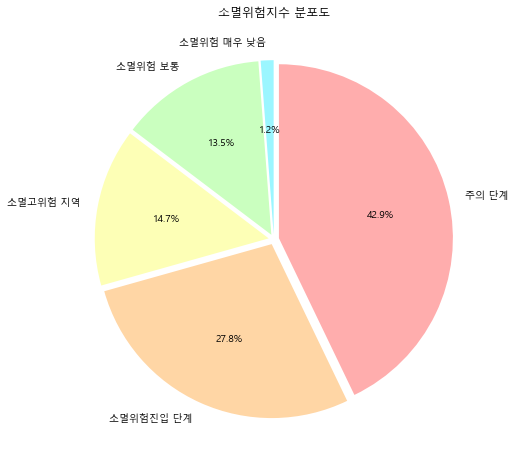

In [80]:
plt.figure(figsize=(8,8))
colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff'] # 그래프 색깔 지정
explode = [0.03] * 5 # 그래프 label 간격 지정
plt.pie(x = df_K_pivot['명칭'].value_counts(), labels=df_K_pivot['명칭'].value_counts().index, autopct='%.1f%%', startangle=90, counterclock=False, colors=colors, explode=explode)
plt.title('소멸위험지수 분포도')

In [81]:
df_2 = df_K_pivot[df_K_pivot['명칭'] == '소멸고위험 지역']

In [82]:
df_2

,행정구역(시군구)별,소멸지수,명칭
0,경북 군위군,0.114,소멸고위험 지역
1,경북 의성군,0.122,소멸고위험 지역
2,전남 고흥군,0.124,소멸고위험 지역
3,경남 합천군,0.132,소멸고위험 지역
4,전남 신안군,0.138,소멸고위험 지역
5,경북 봉화군,0.138,소멸고위험 지역
6,경북 청송군,0.139,소멸고위험 지역
7,경남 남해군,0.144,소멸고위험 지역
8,경북 청도군,0.145,소멸고위험 지역
9,경북 영양군,0.147,소멸고위험 지역


In [83]:
move_df = pd.DataFrame({
    '연도' : np.arange(2000,2022)
})

In [84]:
df_2_region = pd.DataFrame({
    'count' : np.repeat(1, len(list(df_2.loc[:, '행정구역(시군구)별'].values)))
})
for i in range(len(list(df_2.loc[:, '행정구역(시군구)별'].values))):
    df_2_region.at[i, '행정구역별'] = list(df_2.loc[:, '행정구역(시군구)별'].values)[i].split(" ")[0]

In [85]:
df_2_region

,count,행정구역별
0,1,경북
1,1,경북
2,1,전남
3,1,경남
4,1,전남
5,1,경북
6,1,경북
7,1,경남
8,1,경북
9,1,경북


In [86]:
df_2_region.groupby('행정구역별').sum().style.background_gradient(cmap='OrRd')

,count
행정구역별,
경남,7
경북,9
전남,9
전북,6
충남,3
충북,3


In [87]:
df_K.style.background_gradient()

,행정구역(시군구)별,20-39세 여성,65세 이상 인구,소멸지수
0,강원도 강릉시,21292.500000,46078.000000,0.462097
1,강원도 고성군,1984.500000,8054.000000,0.246399
2,강원도 동해시,7962.000000,18476.500000,0.430926
3,강원도 삼척시,5582.500000,16595.000000,0.336397
4,강원도 속초시,8097.500000,16143.500000,0.501595
5,강원도 양구군,2106.000000,4761.000000,0.442344
6,강원도 양양군,1993.000000,8450.500000,0.235844
7,강원도 영월군,2561.500000,11483.000000,0.223069
8,강원도 원주시,43241.500000,54703.500000,0.790470
9,강원도 인제군,3046.000000,6675.000000,0.456330
